# L8b: Markov Decision Processes and Value Iteration
In this lab/exercise, we will explore the concept of Markov Decision Processes (MDPs) and the Value Iteration algorithm. 

* __Scenario__: Suppose you have a [roomba](https://www.irobot.com) that has finished cleaning the floor in your kitchen and needs to return to its charging station. However, between your kitchen and the `charging station` (home base and safety), there are one or more `lava pits` (destruction for the [roomba](https://www.irobot.com)). This is an example of a two-dimensional grid-world navigational decision task. The goal is to find the optimal path for the [roomba](https://www.irobot.com) to safely return to its charging station without falling into a lava pit.
* __Objective__: We want to develop a _policy function_ that the [roomba](https://www.irobot.com) can use to navigate to its charging station from any location in the grid world.

Today, we'll pose the [roomba](https://www.irobot.com) navigation problem as [a Markov Decision Process (MDP)](https://gibberblot.github.io/rl-notes/single-agent/MDPs.html) and solve it using the [Value iteration algorithm](https://gibberblot.github.io/rl-notes/single-agent/Value-Iteration.html). The key concepts we will cover are:

* [A Markov Decision Process (MDP)](https://gibberblot.github.io/rl-notes/single-agent/MDPs.html) is a mathematical framework for modeling sequential decision-making problems where outcomes are partially random and partially influenced by an agent’s actions. It formalizes scenarios involving states, actions, probabilistic transitions between states, and rewards to optimize cumulative rewards where assume the world follows the Markov Property (future states depend only on the current state and action).
* __The state-action value function__ $Q(s, a)$ represents the expected cumulative reward an agent receives when taking action $a$ in state $s$ and subsequently following an optimal policy, defined as (infinite horizon) $Q^{\pi}(s, a) = \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty}\gamma^{k}r_{t+k+1}\mid{s_{t}=s, a_{t}=a}\right]$, where $r_{t+k+1}$ is the immediate reward, $\gamma$ is the discount factor, and $s_{t}$ the state, $a_{t}$ is the action and $\pi$ denotes a _policy function_. The optimal policy $\pi^{\star}(s)$ is the policy that selects the action that maximizes the state-action value function, i.e., $\pi^{\star}(s) = \arg\max_{a} Q(s, a)$.
* [Value Iteration](https://gibberblot.github.io/rl-notes/single-agent/Value-Iteration.html) is a dynamic programming algorithm that computes the optimal value function for a Markov Decision Process (MDP) by applying the Bellman backup operation, which calculates the expected utility of a state by considering the immediate reward and the expected utility of the _next state_ (one step ahead). The optimal policy can be extracted from the optimal value function by selecting the action that maximizes the expected utility. 

For more information on these concepts, please take a look at the [Reinforcement Learning Notes](https://gibberblot.github.io/rl-notes/) prepared by [Prof. Tim Miller from The University of Queensland](https://uqtmiller.github.io)

## Tasks
Before we start, divide into teams and familiarize yourself with the lab. Then, execute the `Run All Cells` command to check if you (or your neighbor) have any code or setup issues. Code issues, then raise your hands - and let's get those fixed!

* __Task 1 Setup, Data, and Prerequisites__: In this task, we build the grid world. Setup a $n_{r}\times{n}_{c}$ grid, encoded this model as an instance of the `MyRectangularGridWorldModel` type
    * `TODO`: Inspect the data inside our grid world model, understand what each describes
* __Task 2 Generate the components of the MDP problem__: In this task, we use our `MyRectangularGridWorldModel` instance to generate the components of the `MDP,` namely, the return function (or array) `R(s, a),` and the model of the physics of the world in the transition function (or array) `T(s, s′, a).`
* __Task 3 Estimate the optimal value function__: Use a `value iteration` method to estimate the optimal value (utility) function $U^{\star}(s)$
    * `TODO`: Extract the `state-action-value function` or $Q(s, a)$ from the optimal optimal value (utility) function $U^{\star}(s)$ 
    * `TODO`: Compute the optimal navigation policy $\pi^{\star}(s)$ from $Q(s,a)$
    * `TODO`: Visualize the optimal policy

## Markov Decision Processes (MDPs)
A Markov decision process (MDP) models decision-making in situations where outcomes are partly random and partly under the control of a decision-maker. An MDP consists of the tuple of components $\left(\mathcal{S}, \mathcal{A}, R_{a}\left(s, s^{\prime}\right), T_{a}\left(s,s^{\prime}\right), \gamma\right)$:

### Components of an MDP
* The state space $\mathcal{S}$ is the set of all possible states $s\in\mathcal{S}$ that a system can exist in. For example, let's suppose we define our state space as the set of investor moods $\mathcal{S} \equiv \left\{\text{bullish},\text{neutral},\text{bearish}\right\}$, or the set of locations in a grid-world $\mathcal{S} \equiv \left\{\text{location}_{1},\text{location}_{2},\ldots,\text{location}_{n}\right\}$. This is a similar idea to contexts in a contextual bandit problem.
* The action space $\mathcal{A}$ is the set of all possible actions $a\in\mathcal{A}$ available to the agent, where $\mathcal{A}_{s} \subseteq \mathcal{A}$ is the subset of the action space $\mathcal{A}$ that is accessible from state $s$. In our investor example, the action space could be defined as $\mathcal{A} \equiv \left\{\text{buy},\text{hold},\text{sell}\right\}$, while for a grid-world, the action space could be defined as $\mathcal{A} \equiv \left\{\text{up},\text{down},\text{left},\text{right}\right\}$.
* A reward $R_{a}\left(s, s^{\prime}\right)$ is received after transitioning from $s\rightarrow{s}^{\prime}$ due to action $a$. For example, this could be the proceeds (or losses) from the sale of shares of asset `XYZ` or moving from one location to another in a grid world.
* The state transition model $T_{a}\left(s,s^{\prime}\right) = P(s_{t+1} = s^{\prime}~|~s_{t}=s,a_{t} = a)$ denotes the probability that action $a$ in state $s$ at time $t$ will result in state $s^{\prime}$ at time $t+1$. This idea is similar to a Markov model, e.g., it has the Markov property but involves both the current state $s$ and action $a$ as conditions to transition to the next state.
* The discount factor $0<\gamma<1$ weighs the future expected utility of choices. The discount factor $\gamma$ is a hyper-parameter that you select.

Finally, a policy function $\pi:\mathcal{S}\rightarrow\mathcal{A}$ is the mapping from states $s\in\mathcal{S}$ to actions $a\in\mathcal{A}$ used by the agent to solve a decision task. Ultimately, we want to develop an optimal policy function (one that gives us the best possible decisions). There are a large number of techniques to create optimal policy functions.


## Value Iteration
[Value iteration](https://gibberblot.github.io/rl-notes/single-agent/Value-Iteration.html) computes the optimal value function $U^{\star}(s)$ (and from that we cabn estimate an optimal policy $\pi(s)$) using a greedy $\textit{Bellman backup}$ operation:
$$
\begin{equation*}
U_{t+1}(s) = \underset{a\in\mathcal{A}}{\max}\left(R(s,a) + \gamma\cdot\sum_{s^{\prime}\in\mathcal{S}}T(s^{\prime}\,\vert\,s,a)\cdot{U}_{t}(s^{\prime})\right)
\quad\forall{s}\in\mathcal{S}\quad{t=1,2,\dots\text{convergence}}
\end{equation*}
$$
where $U_{t}(s)$ is the value function at iteration $t$, $R(s,a)$ is the reward for taking action $a$ in state $s$, the transition probability $T(s^{\prime}\,\vert\,s,a)$ describes the probability of moving from state $s$ to state $s^{\prime}$ under action $a$, and $0<\gamma<1$ is the discount factor.

#### Convergence
As $t\rightarrow\infty$ the value function will converge to an optimal utility $\lim_{t\rightarrow\infty}U_{t}(s)\rightarrow{U^{\star}(s)}$.
We can then estimate the optimal policy $\pi^{\star}(s)$ from the optimal $\texttt{state-action-value}$ function $Q^{\star}(s,a)$ constructed using the optimal utility function $U^{\star}(s)$:
$$
\begin{equation*}
Q^{\star}(s,a) = R(s,a) + \gamma\cdot\sum_{s^{\prime}\in\mathcal{S}}T(s^{\prime}\,\vert\,s,a)\cdot{U^{\star}}(s^{\prime})\quad\forall{s\in\mathcal{S},a\in\mathcal{A}}
\end{equation*}
$$
by selecting the action $a\in\mathcal{A}$ that maximizes the utility for each state $s\in\mathcal{S}$:
$$
\begin{equation*}
\pi^{\star}(s) = \underset{a\in\mathcal{A}}{\arg\max}\,Q^{\star}(s,a)\quad\forall{s\in\mathcal{S}}
\end{equation*}
$$

#### Algorithm
Assume we have states $\mathcal{S}$, actions $\mathcal{A}$, a reward function $R(s,a)$ and the transition probability function $T(\star\mid{s,a})$. Then, we can compute the optimal value using the algorithm using something similar to [this example from CMU](https://github.com/varnerlab/CHEME-5820-Labs-Spring-2025/blob/main/labs/week-8/L8b/docs/CMU-QL-L24.pdf).

Finding the optimal value of the utility
You can stop the loop (from the equation) by keep checking the value Q (L8c will compare the 2 Qs)


## Task 1: Setup, Data, and Prerequisites
We set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. 
* The `Include.jl` file also loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem. It checks for a `Manifest.toml` file; if it finds one, packages are loaded. Other packages are downloaded and then loaded.

In [1]:
include("Include.jl");

### Build the world model
We encoded the `rectangular grid world` using the `MyRectangularGridWorldModel` model, which we constructed using a `build(...)` method. Let's set up the data for the world, set up the states, actions, and rewards, and then construct the world model. 
* First, set values for the `number_of_rows` and `number_of_cols` variables, the `nactions` available to the agent, and the `discount factor` $\gamma$. Then, we'll compute the number of states and set the state set $\mathcal{S}$ and the action set $\mathcal{A}$

In [2]:
# set the number of the grid world (has to be a square)

In [3]:
number_of_rows = 30; # number of rows in the grid world
number_of_cols = 30; # number of cols in the grid world
nactions = 4; # number of actions (LRUD)
γ = 0.95; # discount factor
nstates = (number_of_rows*number_of_cols);
𝒮 = range(1,stop=nstates,step=1) |> collect;
𝒜 = range(1,stop=nactions,step=1) |> collect;

Next, we'll set up a description of the rewards, the `rewards::Dict{Tuple{Int,Int}, Float64}` dictionary, which maps the $(x,y)$-coordinates to a reward value. We only need to put `non-default` reward values in the reward dictionary (we'll add default values to the other locations later). Lastly, let's put the locations on the grid that are `absorbing`, meaning the charging station or lava pits in your living room:

In [4]:
# setup rewards -
lava_reward = -1000.0;
charging_reward = 100.0 # we want + not a -

# as much as you want
rewards = Dict{Tuple{Int,Int}, Float64}()
rewards[(1,2)] = lava_reward # lava in the (1,2) square 
rewards[(2,2)] = lava_reward # lava in the (2,2) square 
rewards[(2,3)] = lava_reward # lava in the (2,3) square 
rewards[(4,5)] = lava_reward # lava in the (4,4) square
rewards[(19,20)] = lava_reward # lava in the (19,20) square
#rewards[(64,20)] = lava_reward # lava in the (64,20) square
#rewards[(30,20)] = lava_reward # lava in the (30,20) square
rewards[(4,3)] = charging_reward   # charging station square

# setup set of absorbing states -
absorbing_state_set = Set{Tuple{Int,Int}}()
for (k,v) ∈ rewards
    push!(absorbing_state_set, k);   
end

# Setup soft walls (constraints) -
soft_wall_set = Set{Tuple{Int,Int}}();

Finally, we can build an instance of the `MyRectangularGridWorldModel` type, which models the grid world. We save this instance in the `world` variable. We must pass in the number of rows `nrows`, number of cols `ncols`, and our initial reward description in the `rewards` field into the `build(...)` method

In [5]:
world = build(MyRectangularGridWorldModel, 
    (nrows = number_of_rows, ncols = number_of_cols, rewards = rewards));

#### Questions
__TODO__: Inspect the data inside our grid world model and understand what each field describes. Let's look at: `coordinates, states, moves` and `rewards.`

In [ ]:
# let's look at the fields of the world
world.coordinates

# setting up the grid 70*70 = 4900 entries

Dict{Int64, Tuple{Int64, Int64}} with 900 entries:
  719 => (24, 29)
  699 => (24, 9)
  831 => (28, 21)
  319 => (11, 19)
  687 => (23, 27)
  185 => (7, 5)
  823 => (28, 13)
  420 => (14, 30)
  525 => (18, 15)
  365 => (13, 5)
  638 => (22, 8)
  263 => (9, 23)
  422 => (15, 2)
  242 => (9, 2)
  183 => (7, 3)
  551 => (19, 11)
  224 => (8, 14)
  694 => (24, 4)
  692 => (24, 2)
  177 => (6, 27)
  676 => (23, 16)
  637 => (22, 7)
  730 => (25, 10)
  523 => (18, 13)
  802 => (27, 22)
  ⋮   => ⋮

In [20]:
world.rewards

Dict{Int64, Float64} with 900 entries:
  719 => -1.0
  699 => -1.0
  831 => -1.0
  319 => -1.0
  687 => -1.0
  185 => -1.0
  823 => -1.0
  420 => -1.0
  525 => -1.0
  365 => -1.0
  638 => -1.0
  263 => -1.0
  422 => -1.0
  242 => -1.0
  183 => -1.0
  551 => -1.0
  224 => -1.0
  694 => -1.0
  692 => -1.0
  177 => -1.0
  676 => -1.0
  637 => -1.0
  730 => -1.0
  523 => -1.0
  802 => -1.0
  ⋮   => ⋮

In [8]:
world.moves

Dict{Int64, Tuple{Int64, Int64}} with 4 entries:
  4 => (0, 1)
  2 => (1, 0)
  3 => (0, -1)
  1 => (-1, 0)

## Task 2: Generate the components of the MDP problem
In this task, we'll generate the components of the Markov decision process from our grid world model. The MDP problem requires the return function (or array) `R(s, a),` and the transition function (or array) `T(s, s′, a).` Let's construct these from our grid world model instance, starting with the reward function `R(s, a)`:

### Rewards $R(s,a)$
We'll encode the reward function as a $\dim\mathcal{S}\times\dim\mathcal{A}$ array, which holds the reward values for being in state $s\in\mathcal{S}$ and taking action $a\in\mathcal{A}$. After initializing the `R`-array and filling it with zeros, we'll populate the non-zero values of $R(s, a)$ using nested `for` loops. During each iteration of the `outer` loop, we'll:
* Select a state `s,` an action `a`, and a move `Δ.`
* Compute the new position resulting from implementing action `a` from the current position and store this in the `new_position` variable. * If the `new_position`$\in\mathcal{S}$ is in our initial `rewards` dictionary (the charging station or a lava pit), we use that reward value from the `rewards` dictionary. If we are still in the world but not in a special location, we set the reward to `-1`.
* Finally, if `new_position`$\notin\mathcal{S}$, i.e., the `new_position` is a space outside the grid, we set a penalty of `-50000.0`.

In [21]:
R = let
    R = zeros(nstates, nactions); # all zeros
    for s ∈ 𝒮
        for a ∈ 𝒜
            
            Δ = world.moves[a]; # action encodes move Δ
            current_position = world.coordinates[s] # where we are now s
            new_position =  current_position .+ Δ # new position s^prime 
            if (haskey(world.states, new_position) == true)
                if (haskey(rewards, new_position) == true)
                    R[s,a] = rewards[new_position];
                else
                    R[s,a] = -1.0; # default reward
                end
            else
                R[s,a] = -50000.0; # we are off the grid, big negative penalty
            end
        end
    end
    R
end
# if you got -50000.00 means it goes out of the world

900×4 Matrix{Float64}:
 -50000.0      -1.0  -50000.0   -1000.0
 -50000.0   -1000.0      -1.0      -1.0
 -50000.0   -1000.0   -1000.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
 -50000.0      -1.0      -1.0      -1.0
      ⋮                        
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      -1.0      -1.0
     -1.0  -50000.0      

### Transition $T(s^{\prime} | s,a)$
Next, build the transition function $T(s^{\prime} |s,a)$. We'll encode this as a $\dim\mathcal{S}\times\dim\mathcal{S}\times\dim\mathcal{A}$ [multidimension array](https://docs.julialang.org/en/v1/manual/arrays/) and populate it using nested `for` loops. 

* The `outer` loop we will iterate over actions. For every $a\in\mathcal{A}$, we get the move associated with that action and store it in the `Δ` variable.
* In the `inner` loop, we will iterate over states $s\in\mathcal{S}$. We compute a `new_position` resulting from implementing action $a$ and check if `new_position`$\in\mathcal{S}$. If `new_position` is in the world, and `current_position` is _not_ an `absorbing state` we set $s^{\prime}\leftarrow$`world.states[new_position]`, and `T[s, s′,  a] = 1.0`
* However, if the `new_position` is outside of the grid (or we are jumping from an `absorbing` state), we set `T[s, s,  a] = 1.0`, i.e., the probability that we stay in `s` if we take action `a` is `1.0`.

In [10]:
T = let
    T = Array{Float64,3}(undef, nstates, nstates, nactions);
    fill!(T, 0.0)
    for a ∈ 𝒜
        
        Δ = world.moves[a];
        
        for s ∈ 𝒮
            current_position = world.coordinates[s]
            new_position =  current_position .+ Δ
            if (haskey(world.states, new_position) == true && 
                    in(current_position, absorbing_state_set) == false)
                s′ = world.states[new_position];
                T[s, s′,  a] = 1.0
            else
                T[s, s,  a] = 1.0
            end
        end
    end
    T;
end;

Finally, we construct an [instance of the `MyMDPProblemModel` type](src/Types.jl) which encodes the data required to solve the MDP problem.
* We must pass the states `𝒮`, the actions `𝒜`, the transition matrix `T`, the reward matrix `R`, and the discount factor `γ` into [the `build(...)` method](src/Factory.jl). We store the MDP model in the `m::MyMDPProblemModel` variable:

In [11]:
m = build(MyMDPProblemModel, (𝒮 = 𝒮, 𝒜 = 𝒜, T = T, R = R, γ = γ));

## Task 3: Estimate the optimal value function $U^{\star}(s)$
In this task, we use value iteration to compute an optimal path for the roomba to return to its charging station. We will estimate the optimal value function $U^{\star}(s)$ and extract the optimal policy $\pi^{\star}(s)$ from the value function.

Let's explore value iteration by first constructing an instance of [the `MyValueIterationModel` type](src/Types.jl), which takes the maximum number of iterations as a parameter. Save this in the `value_iteration_model::MyValueIterationModel` variable:

In [12]:
value_iteration_model = MyValueIterationModel(1000); # 

Next, we call [the `solve(...)` method](src/Compute.jl) by passing the `value_iteration_model` instance and our MDP model `m::MyMDPProblemModel` as arguments. The `solve(...)` method iteratively computes the value function $U^{\star}(s)$, by calling [the `backup(...)` function](src/Compute.jl), which in turn calls the [`lookahead(...)` function](src/Compute.jl).:
* The `solve(...)` method iteratively computes the optimal value function $U^{\star}(s)$ and returns it in an instance of the `MyValueFunctionPolicy` type. The policy is stored in the `U` field.

In [13]:
solution = solve(value_iteration_model, m);

In [14]:
solution.U

900-element Vector{Float64}:
  62.26513125000004
 -19.99999999999995
  62.26513125000004
  66.59487500000004
  62.26513125000004
  58.15187468750003
  54.24428095312503
  50.532066905468774
  47.00546356019533
  43.65519038218556
  40.472430863076276
  37.44880931992246
  34.57636885392633
   ⋮
  -7.669258577578335
  -8.285795648699418
  -8.871505866264446
  -9.427930572951222
  -9.95653404430366
 -10.458707342088477
 -10.935771974984053
 -11.388983376234851
 -11.819534207423107
 -12.228557497051952
 -12.617129622199354
 -12.986273141089386

### Questions
`TODO`: Extract the $Q(s, a)$ from the optimal optimal value function $U^{\star}(s)$. We can do this using the `Q(...)` function, which takes `m::MyMDPProblemModel` and the `solution::MyValueFunctionPolicy`
    
```julia
function Q(p::MyMDPProblemModel, U::Array{Float64,1})::Array{Float64,2}

    # grab stuff from the problem
    𝒮, T, R, γ = p.𝒮, p.T, p.R, p.γ;

    # initialize -
    Q_array = Array{Float64,2}(undef, length(𝒮), length(𝒜))

    # main loop
    for s ∈ 1:length(𝒮)
        for a ∈ 1:length(𝒜)
            Q_array[s,a] = R[s,a] + γ*sum([T[s, s′,a]*U[s′] for s′ in 𝒮]);
        end
    end

    return Q_array
end
```

In [15]:
my_Q = Q(m, solution.U)

900×4 Matrix{Float64}:
 -49940.8          62.2651  -49940.8       -1019.0
 -50019.0       -1019.0        -20.0         -20.0
 -49940.8       -1019.0      -1019.0          62.2651
 -49936.7          66.5949      58.1519       58.1519
 -49940.8          62.2651      62.2651       54.2443
 -49944.8          58.1519      58.1519       50.5321
 -49948.5          54.2443      54.2443       47.0055
 -49952.0          50.5321      50.5321       43.6552
 -49955.3          47.0055      47.0055       40.4724
 -49958.5          43.6552      43.6552       37.4488
 -49961.6          40.4724      40.4724       34.5764
 -49964.4          37.4488      37.4488       31.8476
 -49967.2          34.5764      34.5764       29.2552
      ⋮                                   
     -7.66926  -50007.3         -7.66926      -8.87151
     -8.2858   -50007.9         -8.2858       -9.42793
     -8.87151  -50008.4         -8.87151      -9.95653
     -9.42793  -50009.0         -9.42793     -10.4587
     -9.95653  -500

`TODO`: Compute the optimal navigation policy $\pi^{\star}(s)$ from $Q(s,a)$. We can do this using the `policy(...)` function:
 ```julia
 function policy(Q_array::Array{Float64,2})::Array{Int64,1}

    # get the dimension -
    (NR, _) = size(Q_array);

    # initialize some storage -
    π_array = Array{Int64,1}(undef, NR)
    for s ∈ 1:NR
        π_array[s] = argmax(Q_array[s,:]);
    end

    # return -
    return π_array;
end
```

In [16]:
my_π = policy(my_Q)

900-element Vector{Int64}:
 2
 3
 4
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

### Visualize
`Unhide` the code block below to see how we plot the path from a `startstate` to (potentially) one of the absorbing states. The charging station is shown in green, while the lava pits are shown in red. Specify the `startstate` coordinate tuple:

In [23]:
 startstate = (30,30);

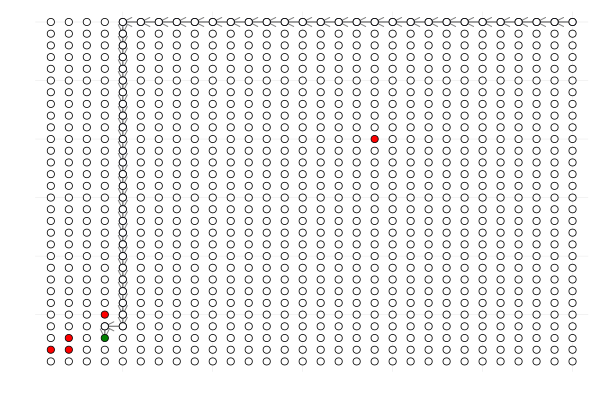

In [24]:
let
    # setup 
    world_model = world;
    is_reward_shaping_on = false;
   
    # draw the path -
    p = plot();
    initial_site = startstate
    hit_absorbing_state = false
    s = world_model.states[initial_site];
    visited_sites = Set{Tuple{Int,Int}}();
    push!(visited_sites, initial_site);

    s′ = s;
    while (hit_absorbing_state == false)
        
        current_position = world_model.coordinates[s′]
        a = my_π[s′];
        Δ = world_model.moves[a];
        new_position =  current_position .+ Δ
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:blue)
        plot!([current_position[1], new_position[1]],[current_position[2],new_position[2]], label="", arrow=true, lw=1, c=:gray)

        s′ = nothing;
        if (in(new_position, absorbing_state_set) == true || in(new_position, visited_sites) == true)
            hit_absorbing_state = true;
        elseif (haskey(world_model.states, new_position) == true)
            s′ = world_model.states[new_position];
            push!(visited_sites, new_position);
        else
            hit_absorbing_state = true; 
        end
    end

    # draw the grid -
    for s ∈ 𝒮
        current_position = world_model.coordinates[s]
        a = my_π[s];
        Δ = world_model.moves[a];
        new_position =  current_position .+ Δ
        
         if (haskey(rewards, current_position) == true && rewards[current_position] == charging_reward)
            scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:green, ms=4)
        elseif (haskey(rewards, current_position) == true && rewards[current_position] == lava_reward)
            scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:red, ms=4)
        elseif (in(current_position, soft_wall_set) == true)
            scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:gray69, ms=4)
        else
            if (is_reward_shaping_on == true)
                new_color = weighted_color_mean(rbf(current_position, charging_station_coordinates, σ = σ), colorant"green", colorant"white")
                scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=new_color)
            else
                scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:white)
            end
        end
    end
    current()
end